# Libraries

In [1]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import Data 

In [5]:
df = pd.read_csv('shopping_trends.csv')

# Data Overview


In [7]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [11]:
df.tail()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Bank Transfer,Store Pickup,No,No,33,Venmo,Quarterly


In [13]:
df.shape

(3900, 19)

In [15]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [28]:
df.drop(columns=['Customer ID'], inplace=True)


In [30]:
df.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


## check for duplicates

In [35]:
df.duplicated().sum()

0

In [37]:
df['Gender'] = df['Gender'].str.strip().str.lower()


## Biggest spender

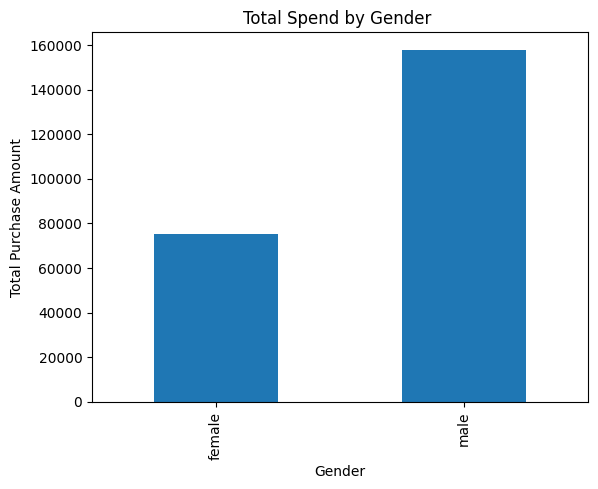

In [48]:
df.groupby('Gender')['Purchase Amount (USD)'].sum().plot(kind='bar')
plt.title('Total Spend by Gender ')
plt.ylabel('Total Purchase Amount')
plt.show()

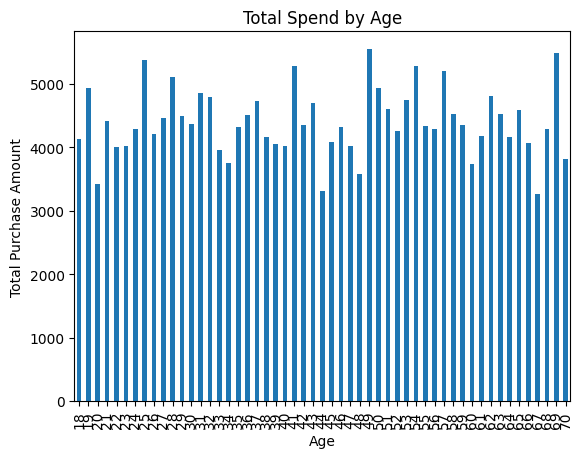

In [50]:
df.groupby('Age')['Purchase Amount (USD)'].sum().plot(kind='bar')
plt.title('Total Spend by Age')
plt.ylabel('Total Purchase Amount')
plt.show()

## Best-selling categories

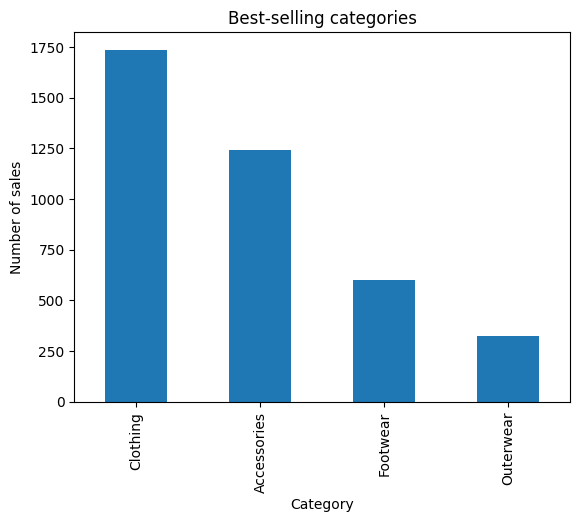

In [58]:
category_counts = df['Category'].value_counts()
category_counts.plot(kind='bar', title='Best-selling categories')
plt.ylabel('Number of sales')
plt.show()

## Age & Gender Effect

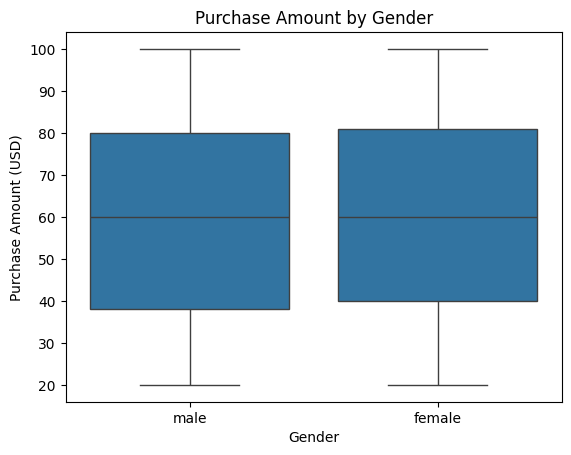

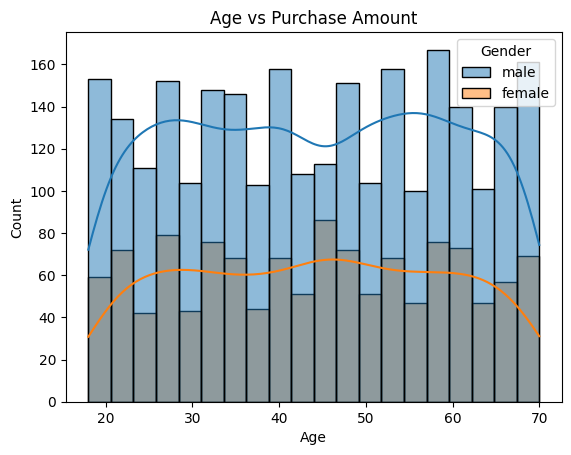

In [65]:
sns.boxplot(data=df, x='Gender', y='Purchase Amount (USD)')
plt.title('Purchase Amount by Gender')
plt.show()
sns.histplot(data=df, x='Age', hue='Gender', kde=True, bins=20)
plt.title('Age vs Purchase Amount')
plt.show()

## Effect of Discounts and Promo Codes

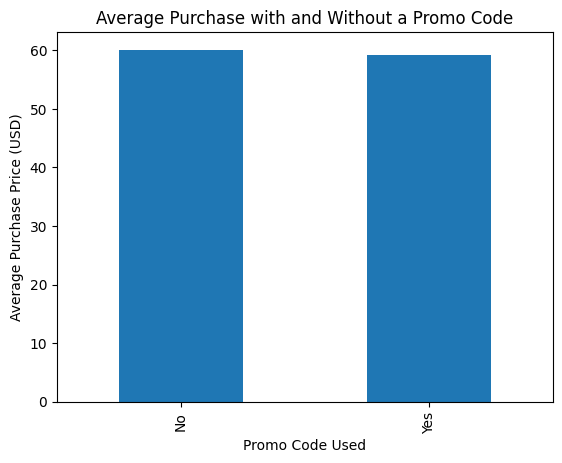

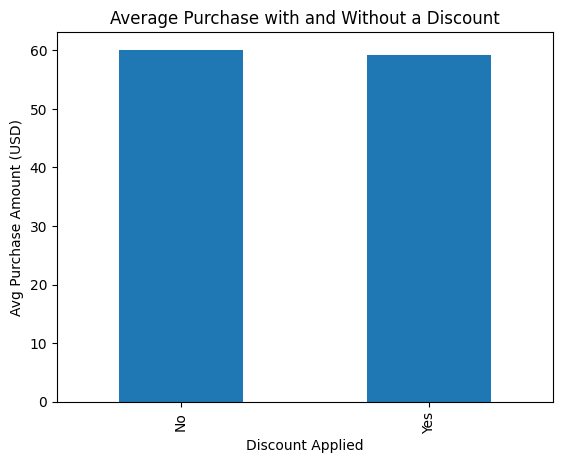

In [76]:
promo_avg = df.groupby('Promo Code Used')['Purchase Amount (USD)'].mean()
promo_avg.plot(kind='bar', title='Average Purchase with and Without a Promo Code', ylabel='Average Purchase Price (USD)')
plt.show()

discount_avg = df.groupby('Discount Applied')['Purchase Amount (USD)'].mean()
discount_avg.plot(kind='bar', title='Average Purchase with and Without a Discount', ylabel='Avg Purchase Amount (USD)')
plt.show()

# Location-Based Sales

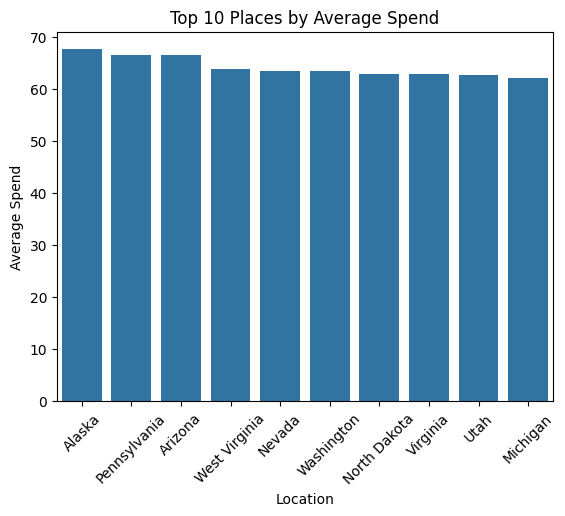

In [102]:
avg_spend_location = df.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending=False)
top_avg_spend = avg_spend_location.head(10).reset_index()
sns.barplot(data=top_avg_spend, x='Location', y='Purchase Amount (USD)')
plt.title('Top 10 Places by Average Spend')
plt.xticks(rotation=45)
plt.ylabel('Average Spend')
plt.show()

# Preferred Mode of Payment and Delivery

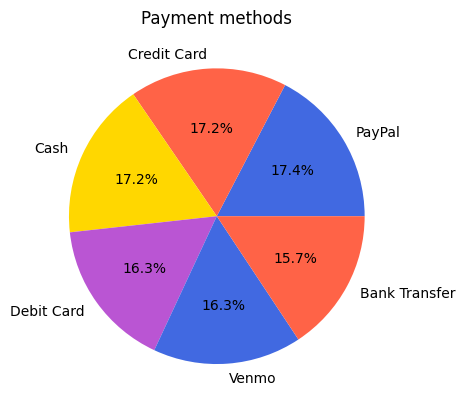

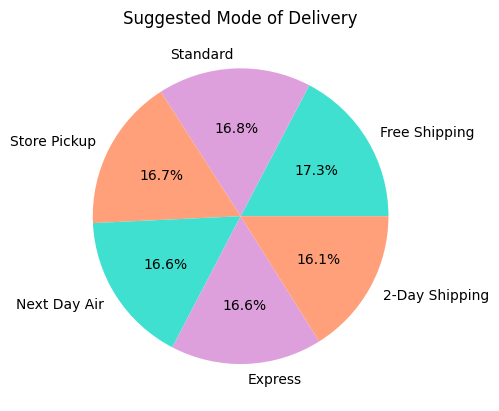

In [116]:
df['Preferred Payment Method'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    title='Payment methods',
    ylabel='',
    colors = ['royalblue', 'tomato', 'gold', 'mediumorchid']
)
plt.show()

df['Shipping Type'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    title='Suggested Mode of Delivery',
    ylabel='',
    colors = ['turquoise', 'plum', 'lightsalmon']
)
plt.show()

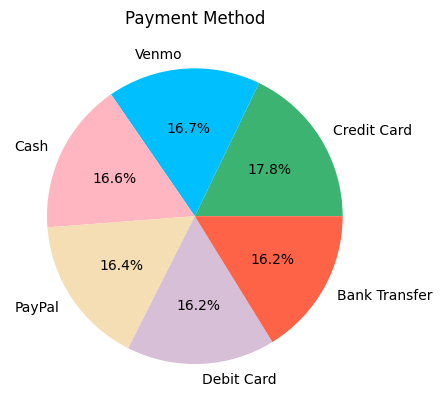

In [126]:
df['Payment Method'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    title='Payment Method',
    ylabel='', 
    colors = ['mediumseagreen', 'deepskyblue', 'lightpink', 'wheat', 'thistle', 'tomato']
)
plt.show()

# Consumption by Gender and Age Group

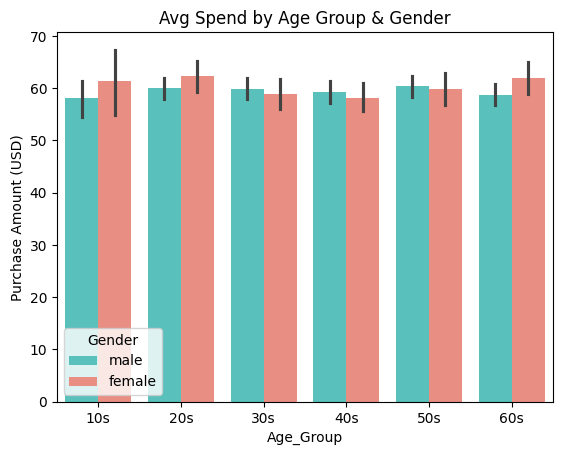

In [145]:
df['Age_Group'] = pd.cut(df['Age'], bins=[10, 20, 30, 40, 50, 60, 70], labels=['10s', '20s', '30s', '40s', '50s', '60s'])

sns.barplot(
    data=df,
    x='Age_Group',
    y='Purchase Amount (USD)',
    hue='Gender',
    estimator='mean',
    palette=['mediumturquoise', 'salmon'] 
)

plt.title('Avg Spend by Age Group & Gender')
plt.show()

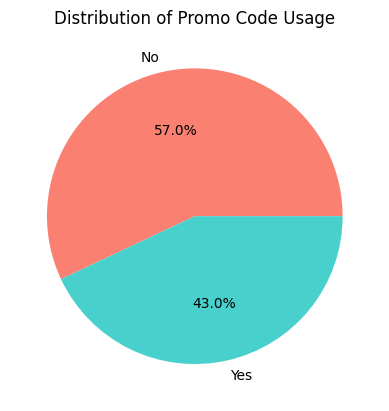

In [160]:
promo_counts = df['Promo Code Used'].value_counts()
promo_counts.plot(kind='pie', autopct='%1.1f%%', colors=['salmon', 'mediumturquoise'])
plt.title('Distribution of Promo Code Usage')
plt.ylabel('') 
plt.show()


## Possibility of spending more moneyabs

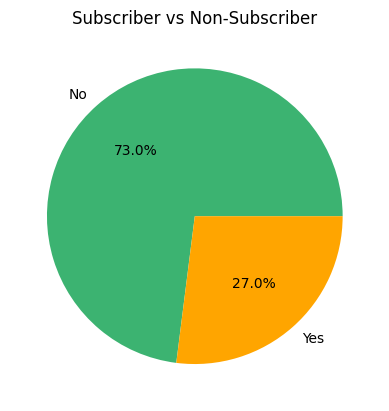

In [165]:
subscription_counts = df['Subscription Status'].value_counts()
subscription_counts.plot(kind='pie', autopct='%1.1f%%', colors=['mediumseagreen', 'orange'])
plt.title('Subscriber vs Non-Subscriber')
plt.ylabel('')
plt.show()

# Best categories

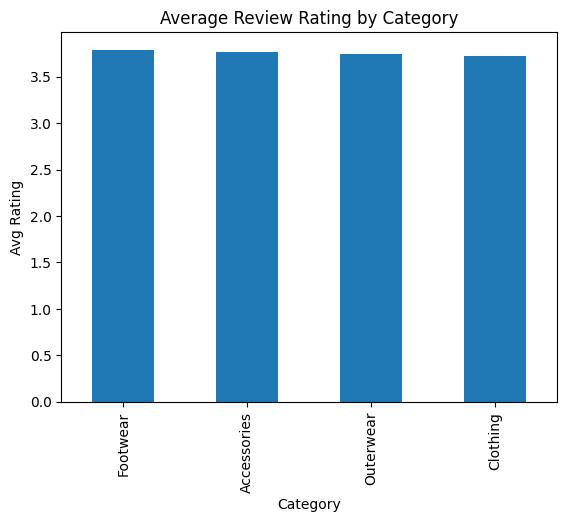

In [171]:
category_ratings = df.groupby('Category')['Review Rating'].mean().sort_values(ascending=False)
category_ratings.plot(kind='bar', title='Average Review Rating by Category')
plt.ylabel('Avg Rating')
plt.show()